
# Assignment No.1
# Title: Principal Component Analysis(PCA)
### Name: Sankalp Laxman Khatake
### Roll No: 23107064
### Div: TY-A
### Batch :B



In [1]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/home/admin1/winequalityN.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [13]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [15]:
df1 = df.copy()

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df1.dropna(inplace =True)

In [21]:
df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [23]:
df1['type'].value_counts()

type
white    4870
red      1593
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['type'] = le.fit_transform(df1['type'])

In [27]:
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
x = df1.drop('type', axis=1)
y = df1['type']  

In [31]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: type, Length: 6463, dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
x_scaled = sta.fit_transform(x)

In [37]:
from sklearn.decomposition import PCA
model = PCA(n_components=5)

In [39]:
data_pca = model.fit_transform(x_scaled)

In [41]:
data_pca

array([[ 2.49836923,  3.16466701, -0.10742263,  0.09531147,  1.91336261],
       [-0.08269753, -0.47392403, -0.4210178 , -0.16154951, -0.37486192],
       [ 0.18303919,  0.29170561,  0.52759909, -0.22941658,  0.4508861 ],
       ...,
       [-2.20830864, -0.65283135, -1.29031679,  1.41103409,  0.07446737],
       [-2.53751532, -0.21505932, -2.6294559 ,  1.11390783, -0.50310317],
       [-1.17991877, -0.62370364,  0.32226459,  1.0176013 , -0.22178485]])

In [328]:
model.explained_variance_

array([3.04385697, 2.64958447, 1.64109737, 1.06870618, 0.841535  ])

In [49]:
model.score

<bound method PCA.score of PCA(n_components=5)>

In [51]:
model.explained_variance_ratio_

array([0.2536155 , 0.22076454, 0.13673695, 0.08904507, 0.07011707])

Text(0, 0.5, 'Second Principal Component')

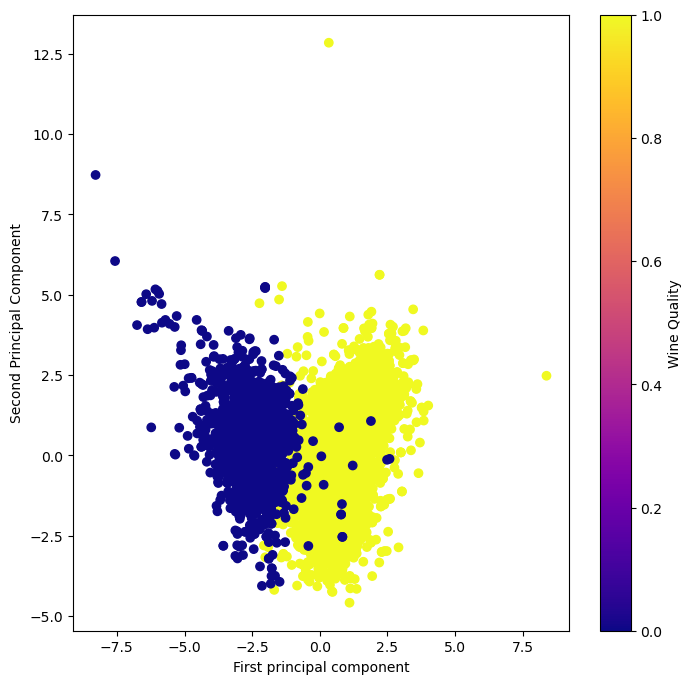

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(data_pca[:,0],data_pca[:,1],c=df1['type'],cmap='plasma')
plt.colorbar(label='Wine Quality')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = model.predict(x_test)

In [61]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred1 = model1.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score,classification_report
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print(cr)
print("Accuracy after PCA on KNn:", acc)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       322
           1       0.99      0.99      0.99       971

    accuracy                           0.99      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.99      0.99      0.99      1293

Accuracy after PCA on KNn: 0.9853054911059551


In [67]:
cr1 = classification_report(y_test,y_pred1)
print(cr1)
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy after PCA on Logistic regression:", acc1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       322
           1       0.99      0.99      0.99       971

    accuracy                           0.99      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       0.99      0.99      0.99      1293

Accuracy after PCA on Logistic regression: 0.9853054911059551
